# 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# 全局变量

In [2]:
batch_size=512
lr  = 10
epoch_num = 20
num_workers=0

# 构造数据集

In [3]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=num_workers)

# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [4]:
inputs = 784
hiddens = 256
out = 10
W_1 = torch.tensor(np.random.normal(0, 0.01, (inputs,hiddens)), dtype=torch.float32)
b_1 = torch.zeros(1,dtype=torch.float32)
W_2= torch.tensor(np.random.normal(0, 0.01, (hiddens,out)), dtype=torch.float32)
b_2 = torch.zeros(1,dtype=torch.float32)
parma = [W_1,b_1,W_2,b_2]
for  i in parma:
    i.requires_grad=True

def relu(x):
    x = torch.max(x,torch.tensor(0.0))
    return x

def f_softmax(z):
    c = torch.max(z)
    exp_a = torch.exp(z - c)  # 溢出对策
    sum_exp_a = torch.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def net(x):
    x = x.view(batch_size,-1)
    t = relu(torch.matmul(x,W_1)+b_1)
    return f_softmax(torch.matmul(t,W_2)+b_2)
def cross_entropy(y_hat, y):
    log_softmax_out = torch.log(y_hat + 1e-7)  # 添加一个小的常数，避免对数中的零
    loss = -torch.sum(y * log_softmax_out) / len(y)
    return loss

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


# 训练

In [5]:
import time

train_loss =[]
test_loss = []
train_acc=[]
test_acc= []
start_time = time.time()
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]

    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = cross_entropy(y_hat,y)

        l.backward()
        sgd(parma,lr,batch_size)
        for i in parma:
            i.grad.data.zero_()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss.append(train_loss_mean)
    train_acc.append(train_acc_mean)


    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = cross_entropy(y_hat,y)
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss.append(test_loss_mean)
    test_acc.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 8.49248649727585 train_acc: 0.45923477564102566 
 test_loss: 8.40076366223787 test_acc: 0.6526521381578947
epoch: 2 
 train_loss: 8.185746910225632 train_acc: 0.6251502403846154 
 test_loss: 7.882915195665862 test_acc: 0.6748560855263158
epoch: 3 
 train_loss: 7.638003227038261 train_acc: 0.734642094017094 
 test_loss: 7.410780680807013 test_acc: 0.7924547697368421
epoch: 4 
 train_loss: 7.322086562458266 train_acc: 0.8101462339743589 
 test_loss: 7.203066549803081 test_acc: 0.8322368421052632
epoch: 5 
 train_loss: 7.170701630095131 train_acc: 0.837623530982906 
 test_loss: 7.086378724951493 test_acc: 0.8550575657894737
epoch: 6 
 train_loss: 7.077805392762535 train_acc: 0.8529981303418803 
 test_loss: 7.009248608037045 test_acc: 0.8689350328947368
epoch: 7 
 train_loss: 7.013237998016879 train_acc: 0.8643162393162394 
 test_loss: 6.954348990791722 test_acc: 0.87890625
epoch: 8 
 train_loss: 6.964796706142589 train_acc: 0.8719784989316239 
 test_loss: 6.91232570

# 模型评估
## 训练用时262.47秒
模型在测试集上的预测精度表现相当不错，随着训练的进行，预测精度从约51%增加到了约91.0%。
模型在训练过程中损失值逐渐减小，从约8.41降低到约6.7。这说明模型在训练数据上逐渐拟合得更好，与预测精的增加一致。此模型拥有较高的可信度。且没有出现过拟合现象模型性能好

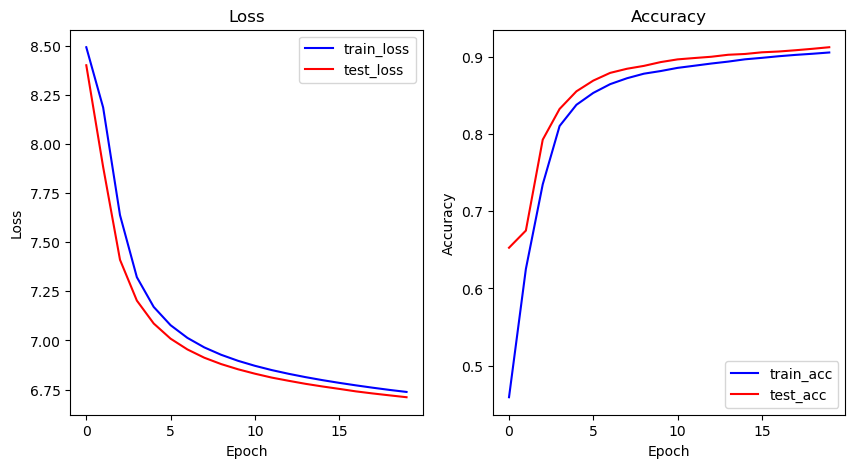

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'b-',label="train_acc")
plt.plot(test_acc, 'r-' ,label="test_acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()